In [17]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

RANDOM_SEED = 42

In [2]:
dataset = 'model/keypoint_classifier/dataset.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier1.keras'

In [3]:
NUM_CLASSES = 13

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
print(X_train.shape)

(1745, 42)


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [36]:
num_timesteps = 10  # Set the number of timesteps based on your data
num_features = 42  # 21 landmarks * 2 coordinates
NUM_CLASSES = 13

In [41]:
# Create sequences
X_sequences = []
y_sequences = []

for i in range(len(X_dataset) - num_timesteps):
    X_sequences.append(X_dataset[i:i + num_timesteps])  # Extract sequences of landmarks
    y_sequences.append(y_dataset[i + num_timesteps])    # Get the label for the last step in the sequence

# Convert to numpy arrays
X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)


In [43]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(num_timesteps, num_features)),  # Shape should match the reshaped input
    tf.keras.layers.GRU(128, return_sequences=True),  # First GRU layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(64),  # Second GRU layer
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')  # Output layer
])

In [44]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 10, 128)             │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 13)                  │             845 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,301 (423.05 KB)

 Trainable params: 108,301 (423.05 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [48]:
# Train the model
model.fit(X_train, y_train, epochs=50,batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.4336 - loss: 1.6258 - val_accuracy: 0.8534 - val_loss: 0.5000 - learning_rate: 0.0100
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8382 - loss: 0.4763 - val_accuracy: 0.9246 - val_loss: 0.2575 - learning_rate: 0.0100
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9116 - loss: 0.2493 - val_accuracy: 0.9116 - val_loss: 0.2724 - learning_rate: 0.0100
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9167 - loss: 0.2264 - val_accuracy: 0.9310 - val_loss: 0.2266 - learning_rate: 0.0100
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9205 - loss: 0.2129 - val_accuracy: 0.9353 - val_loss: 0.2086 - learning_rate: 0.0100
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9391 - loss: 0.1793 - val_accuracy: 0.9203 - val_loss: 0.2792 - learning_rate: 0.0100
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9394 - loss: 0.1621 - val_acc

In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    'model/keypoint_classifier/keypoint_classifier1.keras',  # Change the extension to .keras
    verbose=1,
    save_weights_only=False
)

# Early stopping callback
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [15]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/100
18/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0702 - loss: 2.6176
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.0762 - loss: 2.6041 - val_accuracy: 0.1375 - val_loss: 2.4927
Epoch 2/100
21/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1239 - loss: 2.5182 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1219 - loss: 2.5161 - val_accuracy: 0.0997 - val_loss: 2.4517
Epoch 3/100
20/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1243 - loss: 2.4650  
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1252 - loss: 2.4644 - val_accuracy: 0.1426 - val_loss: 2.4004
Epoch 4/100
18/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1303 - loss: 2.4407  
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier1.ker

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4240 - loss: 1.6601 - val_accuracy: 0.6529 - val_loss: 1.3263
Epoch 25/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4526 - loss: 1.6165 
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4526 - loss: 1.6158 - val_accuracy: 0.6581 - val_loss: 1.3060
Epoch 26/100
26/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4620 - loss: 1.5999 
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4619 - loss: 1.5976 - val_accuracy: 0.6856 - val_loss: 1.2785
Epoch 27/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4603 - loss: 1.6164  
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4605 - loss: 1.6160 - val_accuracy: 0.6821 - val_loss: 1.2585
Epoch 28/100
22/28 ━━━━━━━━━━━━━━━━━━━━ 0

24/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5381 - loss: 1.3563 
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5378 - loss: 1.3563 - val_accuracy: 0.7749 - val_loss: 0.9338
Epoch 49/100
24/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5586 - loss: 1.3072 
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5564 - loss: 1.3138 - val_accuracy: 0.7818 - val_loss: 0.9204
Epoch 50/100
24/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5399 - loss: 1.3353 
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5396 - loss: 1.3376 - val_accuracy: 0.7852 - val_loss: 0.9167
Epoch 51/100
15/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5613 - loss: 1.3556 
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/2

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5709 - loss: 1.2433 - val_accuracy: 0.8007 - val_loss: 0.7863
Epoch 72/100
19/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5722 - loss: 1.2552 
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5759 - loss: 1.2423 - val_accuracy: 0.7938 - val_loss: 0.7760
Epoch 73/100
18/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5915 - loss: 1.2389 
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5878 - loss: 1.2422 - val_accuracy: 0.7990 - val_loss: 0.7680
Epoch 74/100
19/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5520 - loss: 1.2296 
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5576 - loss: 1.2249 - val_accuracy: 0.8093 - val_loss: 0.7670
Epoch 75/100
16/28 ━━━━━━━━━━━━━━━━━━━━ 0s

20/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6142 - loss: 1.1090 
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6088 - loss: 1.1284 - val_accuracy: 0.8058 - val_loss: 0.7002
Epoch 96/100
20/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6124 - loss: 1.1397 
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6127 - loss: 1.1394 - val_accuracy: 0.8127 - val_loss: 0.6905
Epoch 97/100
22/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6052 - loss: 1.1722 
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6055 - loss: 1.1730 - val_accuracy: 0.8093 - val_loss: 0.6945
Epoch 98/100
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5625 - loss: 1.1006
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier1.keras
28/2

In [49]:

val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9823 - loss: 0.1633


In [32]:

model = tf.keras.models.load_model(model_save_path)

In [33]:

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[1.3306462e-02 1.3164550e-01 1.3626278e-03 5.8759116e-02 5.2932680e-02
 3.4660264e-03 1.2212348e-02 5.6213241e-02 3.4563467e-01 3.1288038e-03
 2.5184423e-01 2.4252429e-04 6.9251753e-02]
8


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


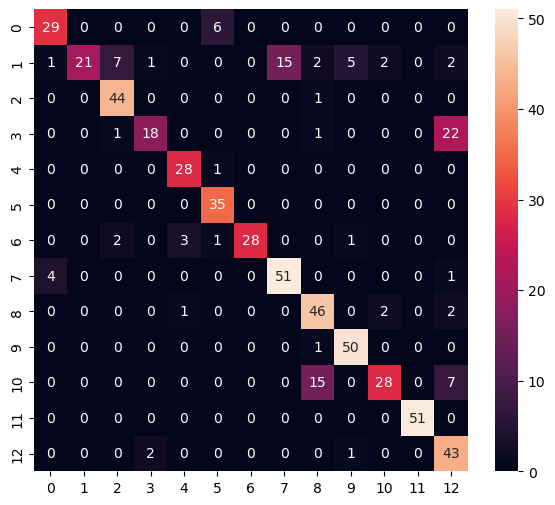

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       1.00      0.38      0.55        56
           2       0.81      0.98      0.89        45
           3       0.86      0.43      0.57        42
           4       0.88      0.97      0.92        29
           5       0.81      1.00      0.90        35
           6       1.00      0.80      0.89        35
           7       0.77      0.91      0.84        56
           8       0.70      0.90      0.79        51
           9       0.88      0.98      0.93        51
          10       0.88      0.56      0.68        50
          11       1.00      1.00      1.00        51
          12       0.56      0.93      0.70        46

    accuracy                           0.81       582
   macro avg       0.85      0.82      0.81       582
weighted avg       0.84      0.81      0.80       582



In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite

In [18]:
model.save(model_save_path, include_optimizer=False)

In [ ]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier1.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpph369hlc\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpph369hlc\assets


In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 997 μs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.8854864e-01 1.0580237e-02 8.7004591e-04 1.2242134e-07 9.1468081e-07]
0
